In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

import cv2
import numpy as np

from deep_translator import GoogleTranslator

from collections import Counter

In [5]:
GoogleTranslator(source='da', target='en').translate(text="bidet")

'the bidet'

## Text string from raw data sets

In [6]:
import os
path = os.getcwd() + "/Data"

files = os.listdir(path)
#files

city_df = pd.read_csv("Data/city_rankings.csv")
taylor_df = pd.read_excel("Data/TaylorSwiftCross.xlsx")

txt = ""
word_list = []
found = {}
for f in files:
    #print(f.split("airbnb_")[1])
    print(f)
    if "airbnb" in f:
        city = f.split("airbnb_")[1].split("_")[0]
    else:
        continue

    df = pd.read_csv("data/" + f)
    for index, row in df.iterrows():
        if row['features'] is np.nan:
            continue

        f_split = row['features'].split("||")
        for f in f_split:
            if "ikke" in f.lower():
                break
            if "soveværelse" in f.lower():
                break

            t_now = f.split("\n")[0]
            t_now = t_now.split(".")[0]
            t_now = t_now.replace(".","")
            t_now = t_now.replace("-", "")

            if t_now == "bidet":
                continue
            elif t_now == "badeværelse":
                continue

            if not t_now in found.keys():
                #print(t_now)
                try:
                    translation = GoogleTranslator(source='da', target='en').translate(text=t_now)
                    #translation = translator.translate(t_now)
                    found[t_now] = translation
                    t_now = translation
                except:
                    found[t_now] = t_now
            else:
                t_now = found[t_now]

            word_list.append(t_now)

            t_now = t_now.replace(" ", "_")

            txt += t_now.strip() + " "

airbnb_Amsterdam_2024-07-04_2024-07-06.csv
airbnb_Barcalona_2024-05-24_2024-05-25.csv
airbnb_Berlin_2024-05-09_2024-05-12.csv
airbnb_Bologna_2024-06-02_2024-06-03.csv
airbnb_Bruxelles_2024-07-04_2024-07-06.csv
airbnb_Copenhagen_2024-05-17_2024-05-19.csv
airbnb_Gelsenkirchen_2024-07-17_2024-07-19.csv
airbnb_Hamburg_2024-07-23_2024-07-24.csv
airbnb_Herning_2024-07-17_2024-07-19.csv
airbnb_Krakow_2024-08-01_2024-08-03.csv
airbnb_Lisbon_2024-05-24_2024-05-25.csv
airbnb_Lyon_2024-06-02_2024-06-03.csv
airbnb_Madrid_2024-05-29_2024-05-31.csv
airbnb_Milan_2024-07-13_2024-07-14.csv
airbnb_Munchen_2024-07-27_2024-07-28.csv
airbnb_Oslo_2024-07-09_2024-07-10.csv
airbnb_Prag_2024-07-27_2024-07-28.csv
airbnb_Stockholm_2024-05-17_2024-05-20.csv
airbnb_Vienna_2024-05-10_2024-05-12.csv
airbnb_Warsaw_2024-08-01_2024-08-03.csv
airbnb_Zürich_2024-07-09_2024-07-10.csv
airbnb_Århus_2024-07-23_2024-07-24.csv
city_rankings.csv
data_final.csv
eventstudydata.xlsx
TaylorSwiftCross.xlsx
TaylorSwift_redigeret.xlsx

## Generate an image mask of taylor swift to use for the word cloud

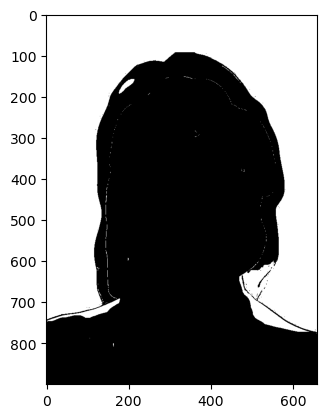

In [8]:
# read input image
img = cv2.imread('imgs/taylor3.jpg')

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_yellow = np.array([0,0,150])
upper_yellow = np.array([172,111,255])

# Create a mask. Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# show image
plt.imshow(mask, cmap='gray')

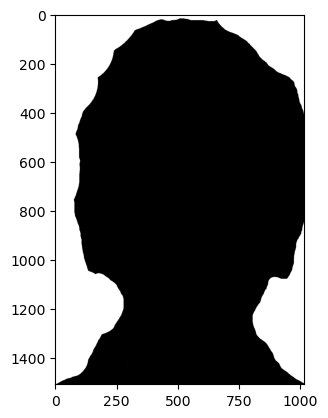

In [9]:
# read input image
img = cv2.imread('imgs/taylor_green.png')

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_green = np.array([50,50,50])
upper_green = np.array([70,255,255])

# Create a mask. Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, lower_green, upper_green)
plt.imshow(mask, cmap='gray')

In [11]:
word_could_dict = Counter(word_list)

# drop from dict
# rename the key in dict
word_could_dict["Bidet"] = word_could_dict.pop("The bidet")

word_could_dict.pop("Bathroom", None)
#word_could_dict.pop("The bidet", None)

19693

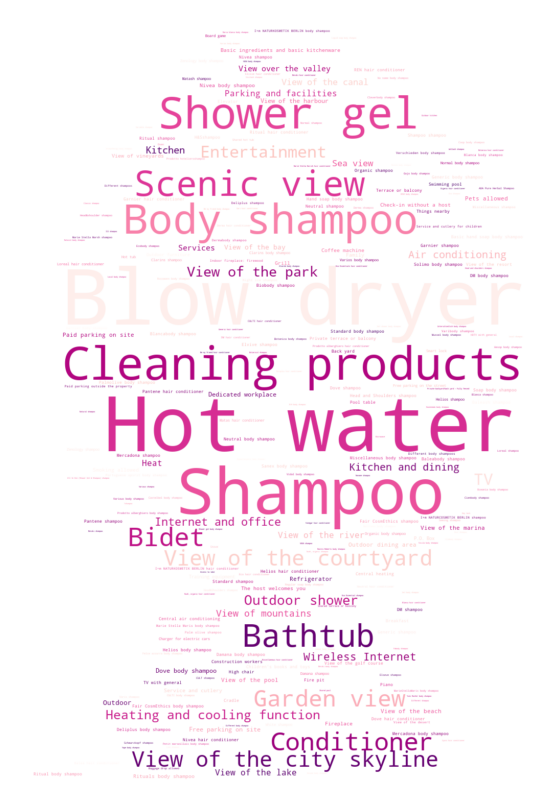

In [13]:
wc = WordCloud(max_words = 1000, background_color = 'white', mask = mask, contour_width = 2,
     contour_color = 'white', collocations=False, colormap = 'RdPu', width = 800, height = 500, prefer_horizontal = 1).generate_from_frequencies(word_could_dict)

fig = plt.figure(figsize = (10, 10), facecolor = None)

plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')
plt.savefig("Figures/wordcloud.png", dpi = 300, bbox_inches = 'tight')